# **DECISION TREE**

# Data Preparation
Load the dataset:

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/heart_disease.xlsx',sheet_name='Heart_disease')

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# Exploratory Data Analysis (EDA)
Understand the structure of the dataset:

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
# Check for missing values
print(df.isnull().sum())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [5]:
# Check for basic statistical details
print(df.describe())


              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [6]:
# Visualize the distribution of features
import matplotlib.pyplot as plt
import seaborn as sns


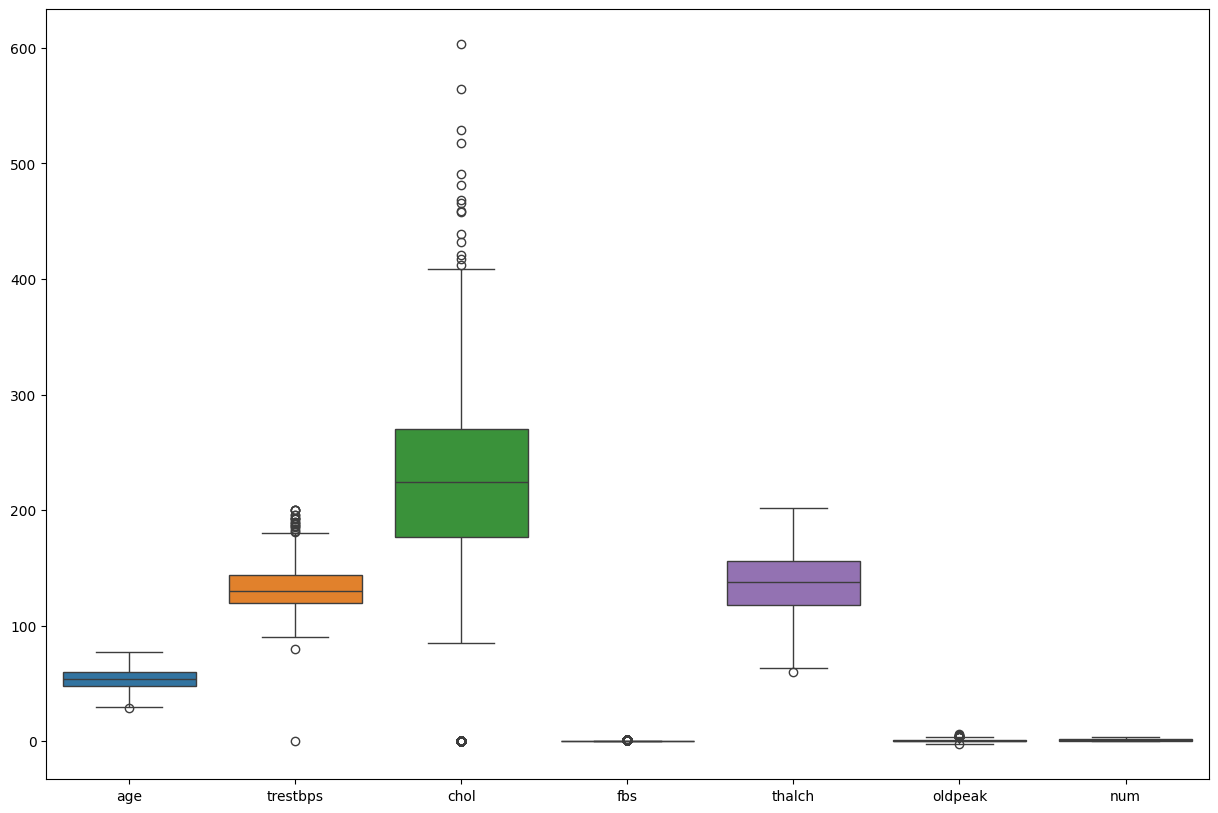

In [8]:
# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.show()

<Figure size 2000x1500 with 0 Axes>

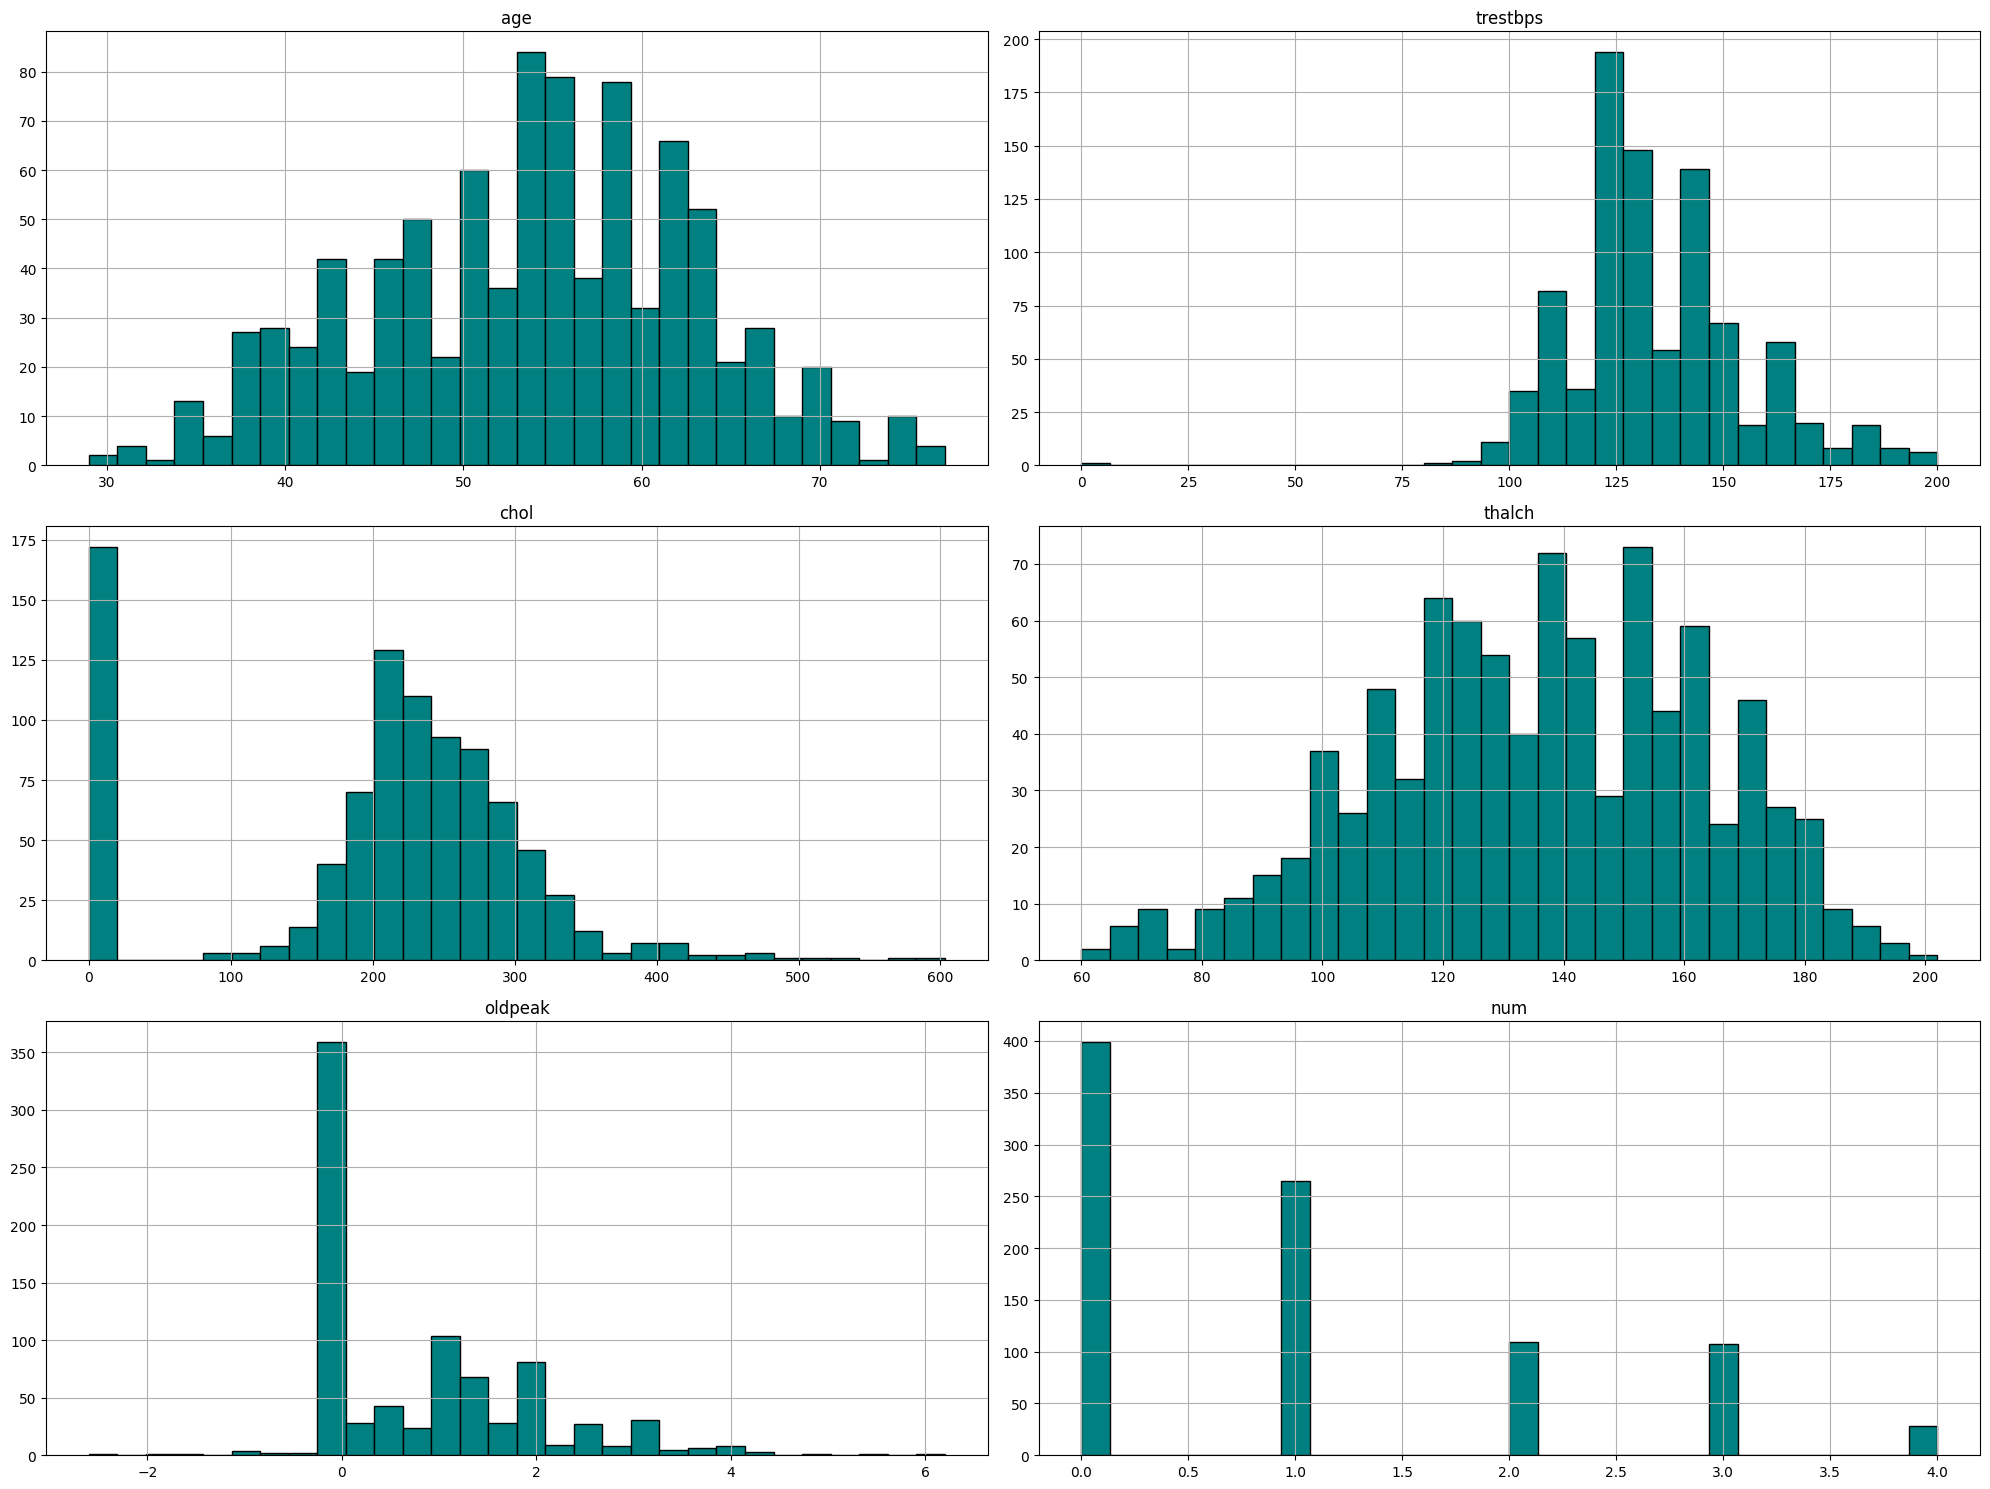

In [9]:
plt.figure(figsize=(20, 15))
df.hist(bins=30, figsize=(20, 15), color='teal', edgecolor='black')
plt.tight_layout()
plt.show()


# Feature Engineering
Handle missing values, encode categorical variables, and scale numerical features if necessary.

In [19]:
# Example of encoding categorical variables
df = pd.get_dummies(df, drop_first=True)


In [20]:
# Example of scaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [21]:
# Handling missing values
df = df.fillna(df.mean())

# Decision Tree Classification
Split the dataset into training and testing sets, implement the Decision Tree model, and evaluate its performance.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

In [27]:
# Splitting the dataset
X = df.drop('num', axis=1)  # Assuming 'num' is the target column
y = df['num']



In [28]:
# Convert continuous labels to discrete classes
y = [int(label) for label in y]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Implementing and training the Decision Tree model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [36]:
# Predicting on the test set
y_pred = dtc.predict(X_test)

In [49]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, dtc.predict_proba(X_test),multi_class='ovr')

In [51]:
# Display the results
results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc}


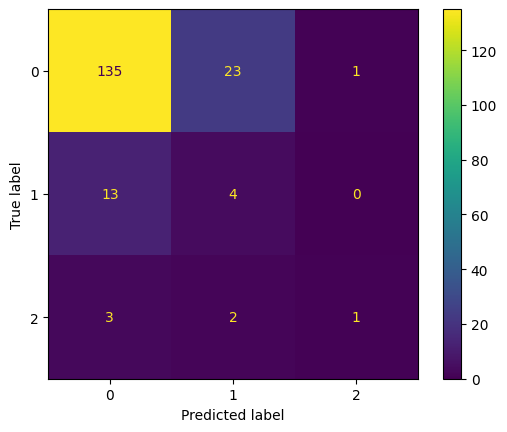

In [52]:
ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test)
plt.show()


In [53]:
print(results)

{'Accuracy': 0.7692307692307693, 'Precision': 0.8104238761923164, 'Recall': 0.7692307692307693, 'F1 Score': 0.7853867731146834, 'ROC-AUC': 0.5663613740795496}


# Hyperparameter Tuning
Perform hyperparameter tuning to optimize the Decision Tree model.

In [54]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']}


In [55]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [56]:
# Best parameters
best_params = grid_search.best_params_

In [57]:
# Best model
best_model = grid_search.best_estimator_


In [61]:
# Evaluating the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
roc_auc_best = roc_auc_score(y_test, best_model.predict_proba(X_test),multi_class='ovr')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
# Display the best results
best_results = {
    'Accuracy': accuracy_best,
    'Precision': precision_best,
    'Recall': recall_best,
    'F1 Score': f1_best,
    'ROC-AUC': roc_auc_best}

In [63]:
print(best_results)

{'Accuracy': 0.8186813186813187, 'Precision': 0.7777668759811617, 'Recall': 0.8186813186813187, 'F1 Score': 0.7975147078432074, 'ROC-AUC': 0.5875085269770522}


# Model Evaluation and Analysis
Analyze the performance of the Decision Tree model and visualize the decision tree struct





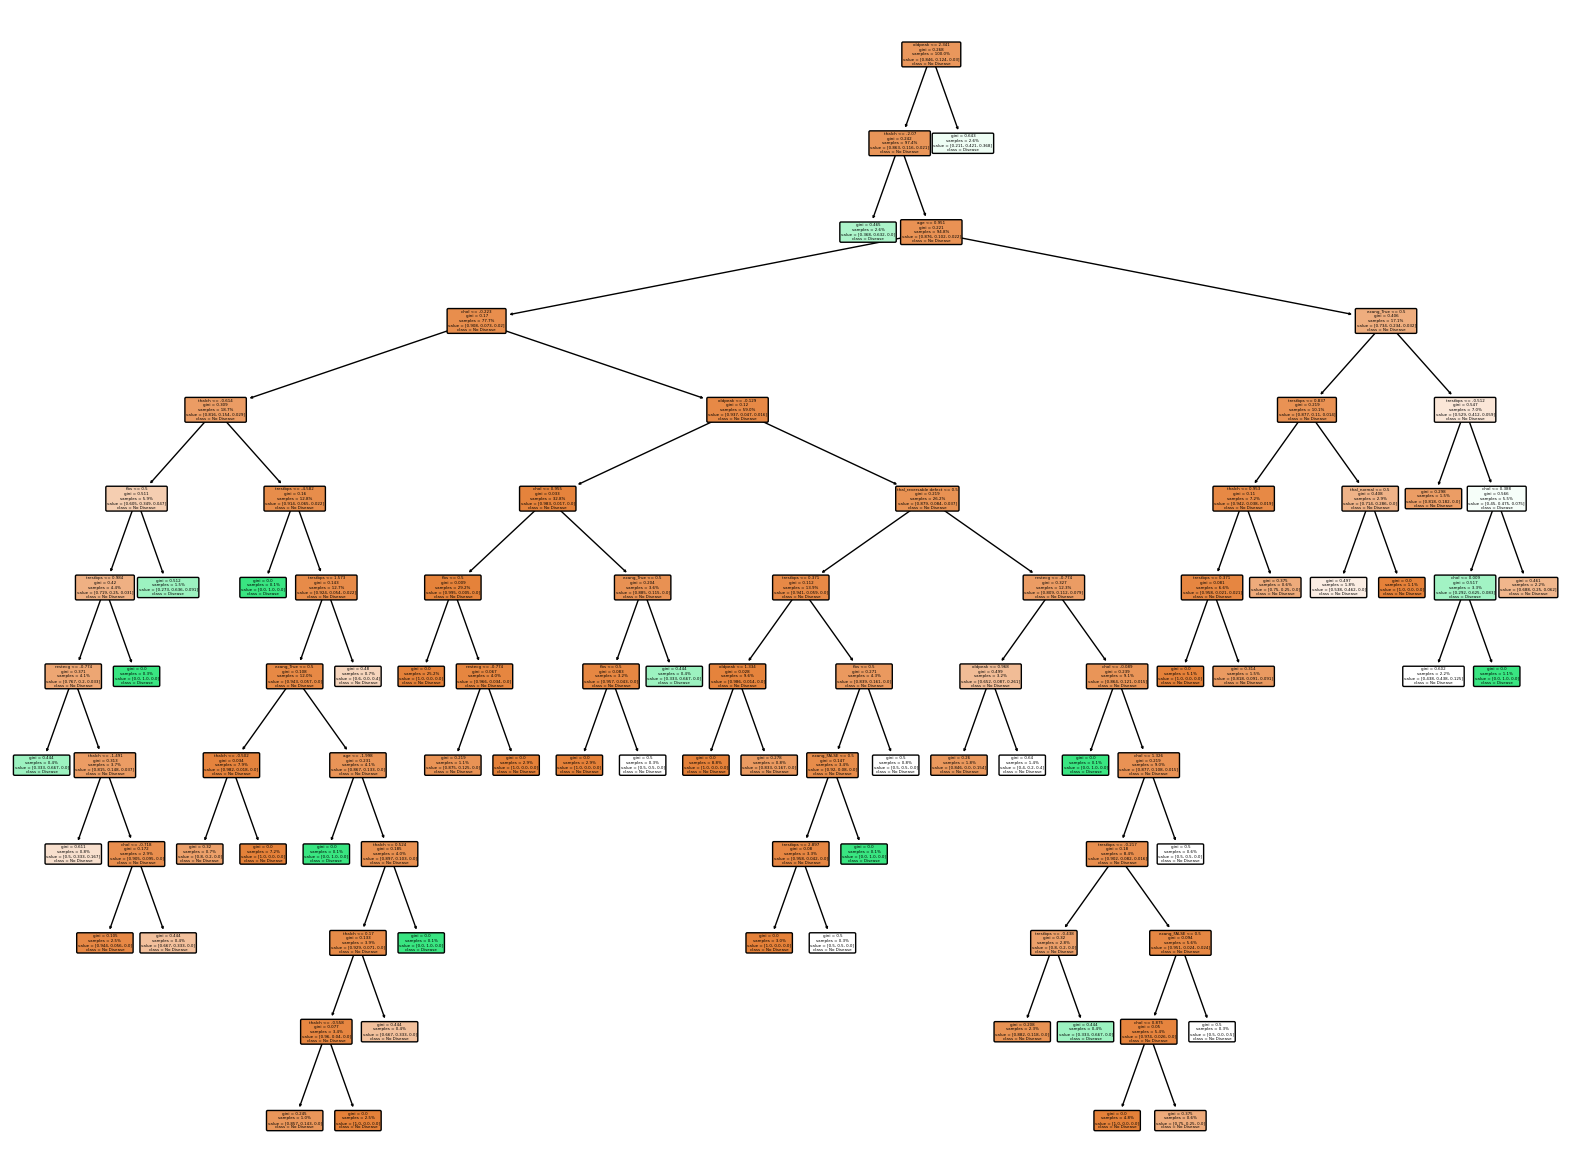

In [64]:
from sklearn.tree import plot_tree

# Visualizing the decision tree
plt.figure(figsize=(20, 15))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'], rounded=True, proportion=True)
plt.show()


In [65]:
# Displaying feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


In [66]:
print(feature_importance)

                   Feature  Importance
7                   thalch    0.209969
8                  oldpeak    0.168860
3                 trestbps    0.146730
4                     chol    0.136281
9               exang_True    0.097587
0                      age    0.078897
5                      fbs    0.060196
6                  restecg    0.036264
10             exang_FALSE    0.028892
14             thal_normal    0.022846
15  thal_reversable defect    0.013478
1                      sex    0.000000
2                       cp    0.000000
11              exang_TURE    0.000000
12              slope_flat    0.000000
13         slope_upsloping    0.000000
